# Homework 6: Sklearn and Pandas (25 points)

name: Ningyuan Wang

email: wningyua@umich.edu

This homework assignment took me 7 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Collaboration Disclosure

In the cell below, please list *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. 

If you did not discuss the homework with anyone else, write __"I did not discuss this homework with anyone."__

Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).)

I discussed P1_6 with Ming-chen Lu. 

## Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

## Nbgrader

We will be using `nbgrader` to grade your jupyter notebook. Additional tests will be used at grading time, you are encouraged to read the problem carefully and verify your code covers all appropriate cases.

**Be careful:** If a jupyter notebook cell takes longer than `60s` to run, the autograder will not grade it and you will receive zero credit for that question.

## Error checking

You do not need to do error checking (raising errors, etc.) in your code unless we explicitly ask you to so in a problem.

## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length 99

## Problem 1: Classification with sklearn (9 points)
In this problem, you'll learn how to build simple supervised classification models using [scikit-learn](https://scikit-learn.org/stable/) a popular python library for Machine Learning models.

In [2]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

### Part 1 (1 point) 

We will be working with the `digits` dataset, which is a available in `sklearn.datasets` and which you briefly saw in class. It consists of images of handwritten digits, where the objective is predicting the true label of each digit given the image. 

The first step in buiding any machine learning model is to visualize and understand your data. Load the `digits` dataset from the `sklearn.datasets` module using the `load_digits` method into a variable called `digits`. Answer the following questions about the dataset by creating the corresponding variable in parenthesis with your answer. 

- What is the size of the dataset? (`N`)

- How many handwritten 6s are in the dataset? (`n_six`)

- What are the dimensions of the images with the handwritten digits? (`dims = (h, w)` a tuple) 

**Hint:** Take a look at the attributes of `digits` and try to figure out what they correspond to. You can use the `dir()` python function. 

In [3]:
# Load dataset and create appropriate variables here
# YOUR CODE HERE
digits = datasets.load_digits()
dir(digits)

N = digits.data.shape[0]  # 1797
n_six = np.count_nonzero(digits.target == 6)  # 181
dims = digits.images[0].shape

In [4]:
assert N > 100
assert n_six > 10
assert type(dims) == tuple

### Part 2 (1 point)
Visualize the first three digits on your dataset using `matplotlib.pyplot` (`plt`). You should use the `add_subplot` method for `plt.figure` to create your three digits in a single `matplotlib` figure. In your plot of each digit, also include the true label for that digit (see the `ax.text` function). Make your your figure is rendered in the cell below. 

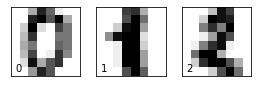

In [5]:
%matplotlib inline 

fig = plt.figure(figsize=(12, 12)) 

for i in range(3):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap="binary")
    ax.text(0, 7, str(digits.target[i]))

### Part 3 (1 point)
The next step is to create __training__ and __testing__ datasets. It is important to split your dataset into these two parts to check whether your algorithm is _generalizing_ well and not just _overfitting_ to your data. Use the __first 100 datapoints for the testing set and the rest for training__. 

You should create 4 variables: 

- `X_train`: Training set of digit images 

- `X_test`: Testing set of digit images

- `y_train`: Labels of training set 

- `y_test`: Labels of testing set. 

__Note:__ We won't be using the image structure of the data to do our classification. Make sure that the shape of your training/testing set of images is `(N_train/N_test x flat_dim)` where `N_train/N_test` is the size of the training/test dataset and `flat_dim = height*width` so that `flat_dim` is the flattened dimension of the digits' images. 

In [6]:
# YOUR CODE HERE
flat_dim = 64

X_test = digits.data[0:100, :]
X_train = digits.data[100:, :]
y_test = digits.target[0:100]
y_train = digits.target[100:]

In [7]:
assert len(X_train.shape) == len(X_test.shape) == 2
assert len(y_train.shape) == len(y_test.shape) == 1

### Part 4 (1 point) 
Now we can create our classifier and fit it to our training set.

Create a __Gaussian Naive Bayes__ classifier with implementation in `sklearn` [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) and fit it to your train data.   

__Note:__ You will notice that this classifier takes in two (optional parameters) `priors` and `var_smoothing`. You can leave both of these optional arguments blank.

In [8]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)

In [9]:
assert type(clf) == GaussianNB
assert clf.predict(X_train[4, None]) == [6]

### Part 5 (1 point) 
There are multiple ways in which you can evaluate the performance of your classifier. One nice visual way of doing it creating a __confusion matrix__. 

Create a `confusion matrix` to evaluate your classifier, using the `sklearn.metrics.confusion_matrix` module and store it in a variable `cf_matrix`. You will need to obtain predicted labels for the training set using your classifier. 

What is the meaning of the row and columns of the confusion matrix? How are they sorted? Make sure you understand this by looking at the documentation. 

What seems to be the most "confusing" digit (the one that was misclassified the most often in terms of absolute counts)? Enter your answer as `confusing_digit` in the cell below. Break ties by selecting the largest digit.

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
max_confusing = np.argmax((cf_matrix.sum(axis=1) - np.diag(cf_matrix))/cf_matrix.sum(axis=1))
confusing_digit = int(max_confusing)

In [11]:
assert np.all(np.diag(cf_matrix) == np.array([11, 12,  3, 12,  7,  7, 11,  9,  6,  2]))
assert type(confusing_digit) == int

### Part 6 (4 points) 

The digit you found above that this is not guaranteed to be the most overall _confusing_ digit. Our training and testing dataset were chosen at random and in the answer above and you did not take into account the relative frequency of the digits in the testing set. We will fix both of these issues in this part.

- Write a function called `most_confusing_digit` which takes in `X_train, y_train, X_test, y_test`, creates a Gaussian Naive Bayes classifier, trains it, and returns the most confusing digit of the given test set (You can reuse your code from previous parts). Your function should take into account relative frequency, i.e. it should return the digit $n$ that maximizes $m_{n}/N_{n}$ where $m_{n}$ is the total misclassifications of digit $n$ and $N_{n}$ is the total number of times $n$ appears in the testing set.

- Write a function, `confusion_candidates` that takes in the `digits` dataset and uses the `sklearn.model_selection.KFold` function to perform cross validation with 18 folds. Returning a python list with containing with the most confusing digit in each of the folds. Store it in a variable called `candidates`. The `most_confusing_digit` function you just wrote should be helpful. 

- Finally, write a function called `majority_voting` that takes in a list of digits `candidates` and returns the digit that appears the most frequently in this list. Break up ties by returning the smallest digit.

Combine these three functions to find the most confusing digit across the 18 folds, store it in a variable `confusion_digit`.

**Note:** Make sure to NOT use `shuffle=True` in `sklearn.model_selection.KFold`, randomness will break our tests.

In [12]:
from sklearn.model_selection import KFold
from collections import Counter


def most_confusing_digit(X_train, y_train, X_test, y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    max_confusing = np.argmax((cf_matrix.sum(axis=1) - np.diag(cf_matrix))/cf_matrix.sum(axis=1))
    confusing_digit = int(max_confusing)
    return confusing_digit


def confusion_candidates(digits):
    candidates = []
    X = digits.data
    y = digits.target
    kf = KFold(n_splits=18, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dig = most_confusing_digit(X_train, y_train, X_test, y_test)
        candidates.append(dig)
    return candidates


def majority_voting(candidates):
    ct = Counter(candidates)
    highest = max(ct.values())
    keys = sorted(key for key, value in ct.items() if value == highest)
    return max(keys)

In [13]:
# Code here to find the most confusing digit.
# YOUR CODE HERE

candidates = confusion_candidates(digits)
confusion_digit = majority_voting(candidates)

In [14]:
assert type(confusion_digit) == int

In [15]:
assert most_confusing_digit(X_train, y_train, X_test, y_test) == 9
assert majority_voting([1, 2, 3, 4, 2]) == 2

In [16]:
assert type(confusion_candidates(digits)) == list
assert confusion_candidates(digits)[-1] == 3

In [17]:
assert type(confusion_candidates(digits)) == list
assert confusion_candidates(digits)[2] == 2

## Problem 2: Warmup: constructing $pandas$ objects (3 points)
In this problem, you will create two simple `pandas` objects.

### Part 1 (1 point) 

Create a $pandas$ Series object with indices given by the first 10 letters of the English alphabet and values given by the first 10 primes. Assign this object to a variable called `alphaprimes`.

In [18]:
import pandas as pd
# YOUR CODE HERE
import string
alphaprimes = pd.Series([2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
                        index=list(string.ascii_lowercase[0:10]))

In [19]:
assert type(alphaprimes) is pd.core.series.Series
assert alphaprimes['a'] == 2

### Part 2 (2 point)

Below is a table that might arise in a genetics experiment. Reconstruct this as a $pandas$ DataFrame and assign it to a variable called __animals__.

**Hint:** The `pandas.MultiIndex.from_arrays` function might be helpful. You can print your table inside the jupyter notebook to make sure it looks the same as the one we have here. 

![table](table.png "Table")


In [20]:
import pandas as pd

arrs = [np.array(['goat'] * 4 + ['bird'] * 4 + ['llama'] * 4),
        np.array(['A', 'A', 'a', 'a'] * 3),
        np.array(['A', 'a'] * 6)]
index = pd.MultiIndex.from_arrays(arrs, names=['animal', 'parent1', 'parent2'])
s = {'score1': list(range(1, 13)), 'score2': [2, 4, 4, 6, 6, 8, 8, 10, 10, 12, 12, 14]}
animals = pd.DataFrame(s, index=index)

In [21]:
assert type(animals) == pd.core.frame.DataFrame
assert animals.loc[('goat', 'A', 'A'), 'score2'] == 2

In [22]:
assert type(animals) == pd.core.frame.DataFrame
assert animals.loc[('goat', 'A', 'A'), 'score1'] == 1

## Problem 3: Working with $pandas$ DataFrames (6 points)

In this problem, you'll get practice working with $pandas$ DataFrames, reading them into and out of memory, changing their contents
and performing aggregation operations. For this problem, you'll use the celebrated __iris__ data set, which is contained in the `iris.csv` file that should have included with this notebook in `hw5.zip`. 

__Note:__ for the sake of consistency, please use this version of the CSV, and not one from elsewhere.

### Part 1 (2 points)

Read `iris.csv` into Python as a $pandas$ DataFrame. Note that the CSV file includes column headers. Store the following into python variables:

- How many data points are there in this data set? Store into a variable `n_points`

- What are the data types of the columns? Store as a list `dtypes`. 

- What are the column names? Store into a list variable `colnames` 

- The column names correspond to flower species names, as well as four basic measurements one can make of a flower: the width and length of its petals and the width and length of its sepal (the part of the pant that supports and protects the flower itself). What are the species of flower that are included in the data? Store the names into a set `flower_species`

**Hint:** All can be obtained directly by various methods applied to the pandas dataframe you read from `iris.csv`. You should stick with the default order given by the columns of the table. 

In [23]:
# YOUR CODE HERE
iris = pd.read_csv("iris.csv")
n_points = len(iris.index)
dtypes = list(iris.dtypes)
colnames = list(iris.columns.values)
flower_species = set(iris.groupby('Species').groups.keys())

In [24]:
assert type(n_points) == int
assert n_points > 10
assert dtypes[0] == np.dtype('float64')

In [25]:
assert colnames[0] == 'Sepal.Length'
assert type(flower_species) == set

### Part 2 (1 point) 

The data that I uploaded to my website, which you have downloaded, is based on the data initially uploaded to the UC Irvine machine learning repository. It is now known that this data contains errors in two of its rows (see the documentation at https://archive.ics.uci.edu/ml/datasets/Iris). 

Using 1-indexing, these errors are in the 35th and 38th rows. The 35th row should read __4.9,3.1,1.5,0.2,"setosa"__, where the fourth feature is incorrect as it appears in the file, and the 38th row should read __4.9,3.6,1.4,0.1,"setosa"__, where the second and third features are incorrect as they appear in the file. Correct these entries of your DataFrame.

In [26]:
# Your code to correct these entries goes here
# YOUR CODE HERE

iris.iloc[34, 3] = 0.2
iris.iloc[37, 1] = 3.6
iris.iloc[37, 2] = 1.4



In [27]:
assert iris.iloc[34, 3] == 0.2

### Part 3 (1 point) 

The iris dataset is commonly used in machine learning as a proving ground for clustering and classification algorithms. Some researchers have found it useful to use two additional features, called _Petal ratio_ and _Sepal ratio_, defined as the ratio of the petal length to petal width and the ratio of the sepal length to sepal width, respectively. Add two columns to your DataFrame corresponding to these two new features. Name these columns `Petal.Ratio` and `Sepal.Ratio`, respectively.

In [28]:
# Your code for adding these two new columns to the dataset goes here.
# YOUR CODE HERE
iris["Petal.Ratio"] = iris['Petal.Length']/iris['Petal.Width']
iris["Sepal.Ratio"] = iris['Sepal.Length']/iris['Sepal.Width']

In [29]:
assert 'Petal.Ratio' in iris.columns
assert 'Sepal.Ratio' in iris.columns
### BEGIN HIDDENT TESTS
assert np.all(iris['Petal.Ratio'] == iris['Petal.Length']/iris['Petal.Width'])
assert np.all(iris['Sepal.Ratio'] == iris['Sepal.Length']/iris['Sepal.Width'])
### END HIDDENT TESTS

### Part 4 (2 points)

Use a $pandas$ aggregate operation to determine the mean, median, minimum, maximum and standard deviation of the petal and sepal ratio for each of the three species in the data set. Store these results in a pandas dataframe callend `results`. 

__Note:__ you should be able to get all five numbers in a single table (indeed, in a single line of code) using a well-chosen group-by or aggregate operation.

In [30]:
# create your variable results here.
# YOUR CODE HERE
results = iris.groupby("Species")[["Petal.Ratio", "Sepal.Ratio"]].agg([np.mean, np.median,
                                                                       np.min, np.max, np.std])

In [31]:
assert round(results['Petal.Ratio']['mean']['setosa'], 2) == 6.91

In [32]:
assert round(results['Sepal.Ratio']['std']['virginica'], 2) == 0.25

## Problem 4: Plotting Dataframes: Major League Baseball (7 points)

In this problem, you'll get more practice working with $pandas$ data frames and perform some basic plotting. We'll work with a data set consisting of all the baseball games from the 2018 Major League Baseball (MLB) regular season, compiled by _retrosheet.org_. Don't worry--- you don't need to know anything about baseball to complete this assignment! The relevant CSV file `GL2018.TXT` should have been included in `hw5.zip` along with this jupyter notebook. 

__Note:__ even though the zipped file is named as a `.txt` file, it is in fact a CSV file, which $pandas$ will still be able to read. 

__Requisite legal boilerplate:__ The information used here was obtained free of charge from and is copyrighted by Retrosheet.  Interested parties may contact Retrosheet at "www.retrosheet.org".

### Part 1 (1 point)  

Read the data into a table called `mlb_df`. Each row of the table represents the outcome of a single game from the 2018 MLB season. Take note that the file does not have columns names; see the `header` keyword to the `pandas.read_csv` function. The columns are explained in a `.txt` file which you can download from https://www.retrosheet.org/gamelogs/glfields.txt, but we will only make use of a few of them in this problem. 

The 10-th and 11-th columns (using 1-indexing) are the scores of the visiting and home teams, respectively. Rename these columns `v_score` and `h_score`, respectively. MLB comprises two leagues, the American League and the National League, encoded as `AL` and `NL` in the table. The 5-th and 8-th columns (also 1-indexed) are the league affiliations of the visiting and home team, respectively. Rename these columns `v_league` and `h_league`.

In [33]:
# Follow the instructions above and modify the `mlb_df`
# pandas dataframe (keep this name throughout)
import numpy as np
import pandas as pd

# YOUR CODE HERE
mlb_df = pd.read_csv("GL2018.TXT", header=None)
mlb_df.rename(columns={4: "v_league", 7: "h_league", 9: "v_score", 10: "h_score"}, inplace=True)


In [34]:
assert round(np.mean(mlb_df['h_score'].values), 3) == 4.526

### Part 2 (3 points) 

Create a plot with two subplots, placed side-by-side. Each subplot should be a scatter plot in which the x- and y-axes correspond to the home and visitor scores, respectively, and in which each point corresponds to a game from the season. In the left-hand plot, include all games in which both teams were in the NL, and in the right-hand plot, include all games in which both teams were in the AL. Games in which the teams were from different leagues should be ignored. Follow these instructions: 

- Specify the transparency (cf. the `alpha` parameter in the `matplotlib` documentation) so that scores that occur more often will be shaded darker than rare scores. (Check that your final plot has some points that are more transparent than others)

- Color the points in the scatter plot according to the league affiliation of the two teams as follows: games between two teams both in the AL should be rendered as red points in the scatter plot. Games between two teams both in the NL should be rendered as blue points in the scatter plot. 

- Label your axes and provide an appropriate title for your plot as well as its subplots. 

- Check that your plot is rendered in the notebook when you run the cell below. 

__Note:__ you may find it useful to create an extra column in the dataframe of whether a given game is AL vs AL, NL vs NL or mixed.

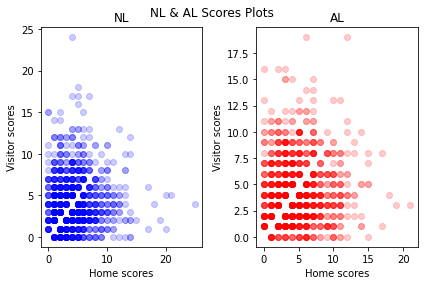

In [35]:
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt 

# YOUR CODE HERE
df = mlb_df[["h_league", "v_league", "h_score", "v_score"]][mlb_df["h_league"]==mlb_df["v_league"]]
nl_df = df[df["h_league"]=="NL"]
al_df = df[df["h_league"]=="AL"]

fig, axes = plt.subplots(1,2)
plt.suptitle("NL & AL Scores Plots")
axes[0].scatter(nl_df["h_score"], nl_df["v_score"], c="b", alpha=0.2)
axes[0].set_title('NL')
axes[0].set_xlabel('Home scores')
axes[0].set_ylabel('Visitor scores')

axes[1].scatter(al_df['h_score'],al_df['v_score'], c='r', alpha=0.2)
axes[1].set_title('AL')
axes[1].set_xlabel('Home scores')
axes[1].set_ylabel('Visitor scores')
fig.tight_layout()
plt.show()

### Part 3 (2 points) 

The Skellam distribution https://en.wikipedia.org/wiki/Skellam_distribution) is the distribution that results from taking the difference between two Poisson random variables. It is often suggested as a model for the difference between scores in sports games, particularly baseball. Add a new column to the data frame called `score_diff`, given by the home score minus the away score. Make a histogram of this score difference and give the plot an appropriate title/axis titles.

**Note:** Make sure the cell below displays the plot in this notebook. 

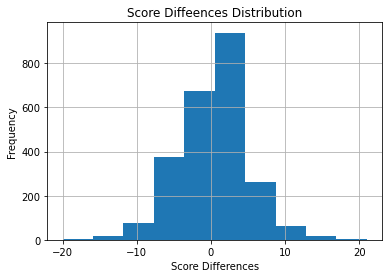

In [36]:
%matplotlib inline
# YOUR CODE HERE
mlb_df["score_diff"] = mlb_df["h_score"] - mlb_df["v_score"]

mlb_df.hist("score_diff")
plt.title("Score Diffeences Distribution")
axes[0].set_title('NL')
plt.xlabel('Score Differences')
plt.ylabel('Frequency')
plt.show()

### Part 4 (1 point)

Read the documentation about the __scipy__ implementation of the Skellam distribution at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skellam.html . If $\lambda_H$ and $\lambda_V$ are the means of two independent Poisson random variables $K_H$ and $K_V$, respectively, then the Skellam distribution that describes the difference $K_H - K_V$ has parameters $\lambda_H$ and $\lambda_V$. 

Estimate parameters $\hat{\lambda}_H$ and $\hat{\lambda}_V$ as the means of the home and visitor scores, respectively. Save your estimates in variables `lambda_home` and `lambda_visitor`, respectively.

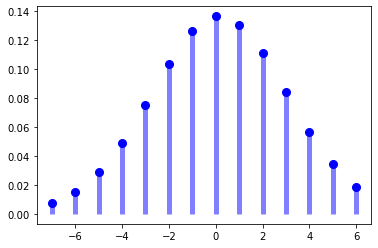

True

In [37]:
# create your variables here.
# YOUR CODE HERE
from scipy.stats import skellam
ro = mlb_df["h_score"].corr(mlb_df["v_score"])
lambda_home = np.mean(mlb_df["h_score"])
lambda_visitor = np.mean(mlb_df["v_score"])
mu_h = lambda_home - ro * np.sqrt(lambda_home * lambda_visitor)
mu_v = lambda_visitor - ro * np.sqrt(lambda_home * lambda_visitor)

fig, ax = plt.subplots(1, 1)
rv = skellam(mu_h, mu_v)
# ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
# ax.legend(loc='best', frameon=False)
# plt.show()
x = np.arange(skellam.ppf(0.01, mu_h, mu_v),
              skellam.ppf(0.99, mu_h, mu_v))
ax.plot(x, skellam.pmf(x, mu_h, mu_v), 'bo', ms=8, label='skellam pmf')
ax.vlines(x, 0, skellam.pmf(x, mu_h, mu_v), colors='b', lw=5, alpha=0.5)
plt.show()
prob = skellam.cdf(x, mu_h, mu_v)
np.allclose(x, skellam.ppf(prob, mu_h, mu_v))

In [38]:
assert round(lambda_home, 3) == 4.526